# I-94 Highway Data Analysis:

## What we're going to do:

+ Play around with the data visualization libraries,
+ Do actual data analysis,
+ Write a conclusion or something.

In [2]:
# We need pandas, seaborn, matplotlib.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
metro.info()
# date_time would have to be converted to a dtetime object.
# holiday is just asking to be culled.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


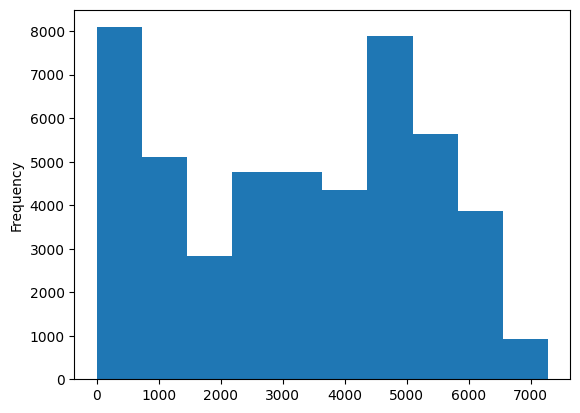

In [4]:
metro['traffic_volume'].plot.hist()
plt.show()

In [5]:
metro['date_time'] = pd.to_datetime(metro['date_time'])
day_time = metro.loc[metro['date_time'].dt.hour.between(7,19),:]
night_time = metro.loc[~(metro['date_time'].dt.hour.between(7,19)),:]

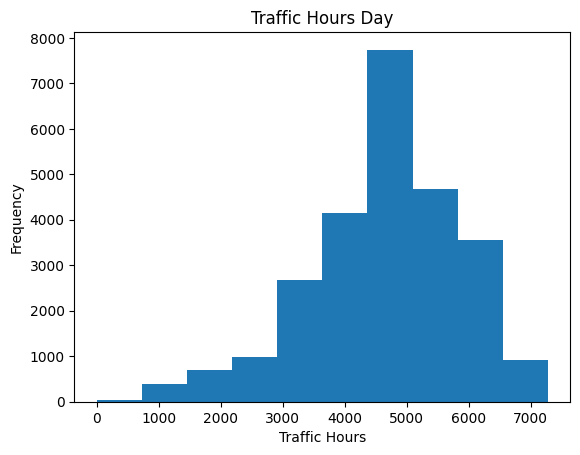

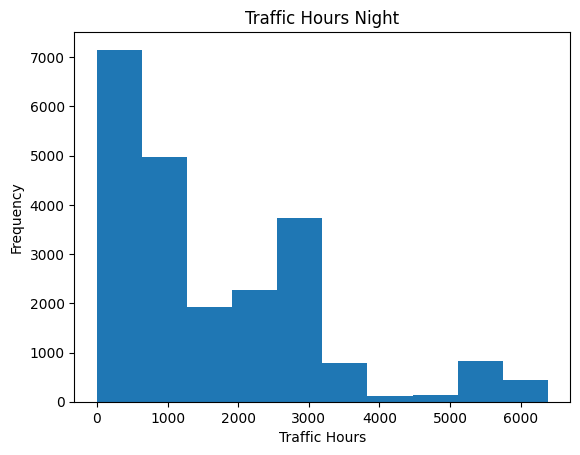

In [6]:
day_time['traffic_volume'].plot.hist(label = 'day')
plt.xlabel('Traffic Hours')
plt.title('Traffic Hours Day')
plt.show()
night_time['traffic_volume'].plot.hist(label = 'night')
plt.xlabel('Traffic Hours')
plt.title('Traffic Hours Night')
plt.show()

In [7]:
day_time['month']=day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean(numeric_only=True)

C:\Users\ellem\AppData\Local\Temp\ipykernel_24420\853965054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_time['month']=day_time['date_time'].dt.month


Text(0, 0.5, 'Traffic Volume')

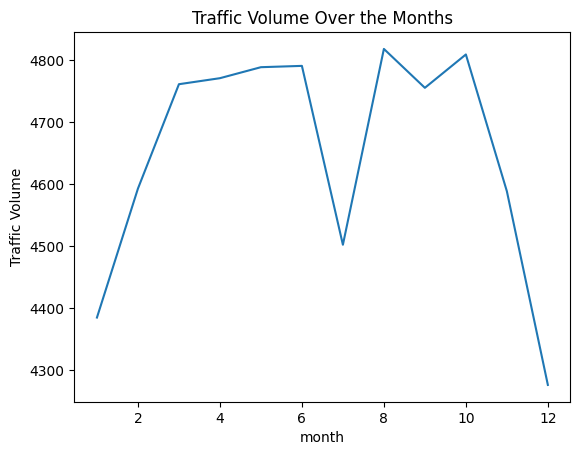

In [9]:
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume Over the Months')
plt.ylabel('Traffic Volume')

C:\Users\ellem\AppData\Local\Temp\ipykernel_24420\4009038281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_time['dayofweek'] = day_time['date_time'].dt.dayofweek


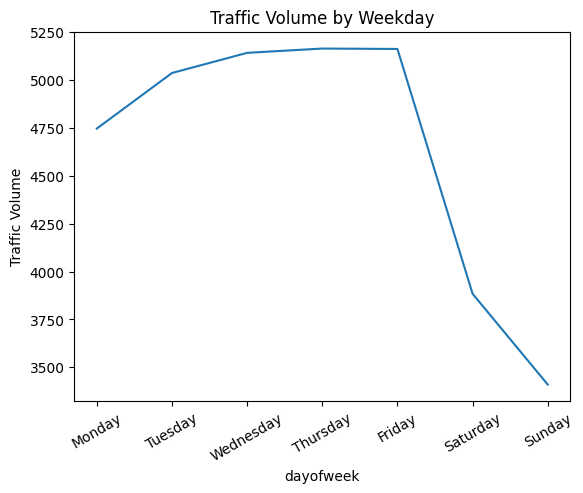

In [16]:
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks=[0,1,2,3,4,5,6], labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation = 30)
plt.title('Traffic Volume by Weekday')
plt.ylabel('Traffic Volume')
plt.show()

## Findings:

+ There is an obvious drop of traffic volume during the weekends explained by the fact that people don't have to go work then.

In [36]:
day_time['hour'] = day_time['date_time'].dt.hour
business_days = day_time.copy()[day_time['dayofweek']<=4]
weekend = day_time.copy()[day_time['dayofweek']>=5]
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

C:\Users\ellem\AppData\Local\Temp\ipykernel_24420\146498951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_time['hour'] = day_time['date_time'].dt.hour


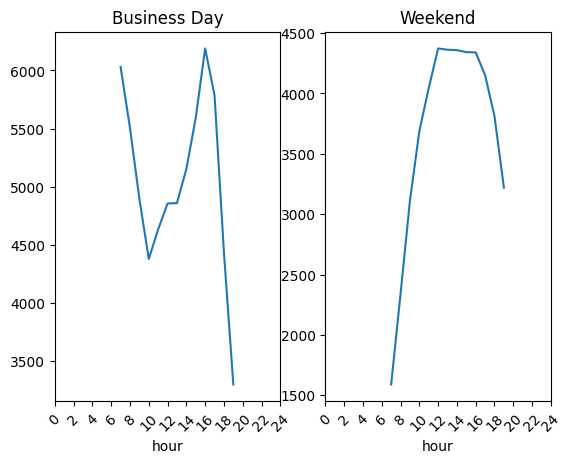

In [37]:
plt.tight_layout()
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Day')
plt.xticks(range(0,26,2), rotation = 45)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend')
plt.xticks(range(0,26,2), rotation = 45)
plt.show()

## Findings:

+ Traffic volumes start high at around 6:00AM and drop before peaking again at 4:00PM, which is explained by the rush hours.

+ Weekends show a gradual growth in traffic volume as the hours pass, before peaking at around 12:00PM and continually decreasing, forming a parabola.

In [49]:
print(day_time['temp'])

0        288.28
1        289.36
2        289.58
3        290.13
4        291.14
          ...  
48195    283.84
48196    284.38
48197    284.79
48198    284.20
48199    283.45
Name: temp, Length: 25838, dtype: float64


temp's Correlation: 0.11808381454022036
rain_1h's Correlation: 0.00402032855325693
snow_1h's Correlation: 0.0037684656522925133
clouds_all's Correlation: -0.03340950373199394


Text(0, 0.5, 'Temperature')

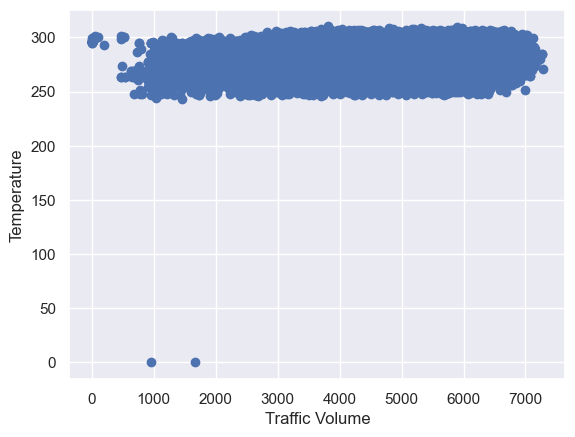

In [68]:
sns.set_theme()
list1=['temp', 'rain_1h', 'snow_1h', 'clouds_all']
for varb in list1:
    print(f"{varb}'s Correlation: {day_time['traffic_volume'].corr(day_time[varb])}")
plt.scatter(day_time['traffic_volume'],day_time['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')

In [50]:
by_weather_main = day_time.groupby('weather_main').mean(numeric_only=True)
by_weather_description = day_time.groupby('weather_description').mean(numeric_only=True)

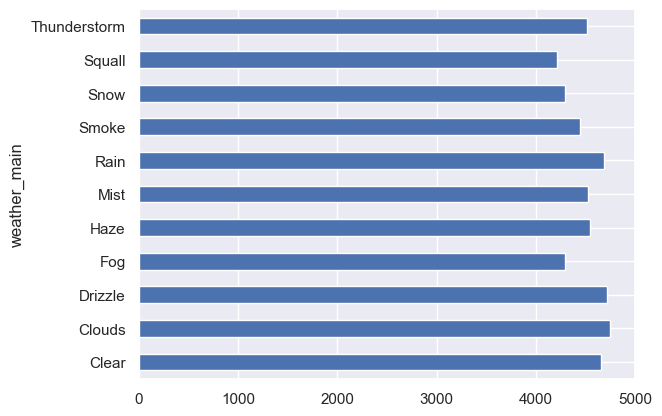

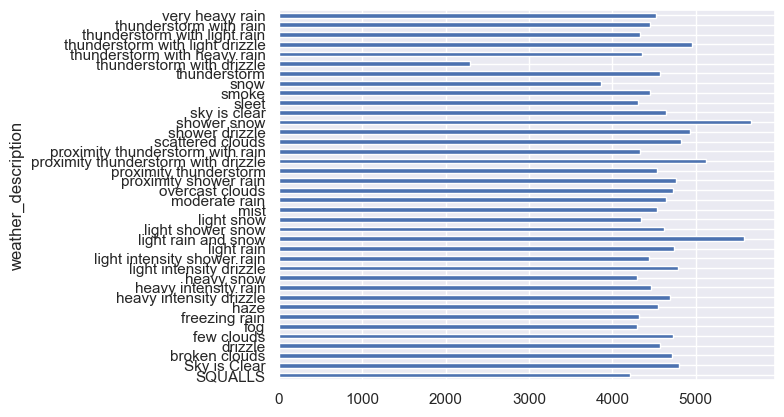

In [67]:
sns.set_theme()
by_weather_main['traffic_volume'].plot.barh()
plt.xticks(range(0,5001,1000))
plt.show()
by_weather_description['traffic_volume'].plot.barh()
plt.show()

## Findings:

+ Therefore, 'shower snows and' 'light rain and snow' lead to the highest volumes of traffic.